In [54]:
%matplotlib inline

import pandas as pd
import numpy as np
import os
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import statsmodels.api as sm
from pylab import rcParams
from matplotlib.backends.backend_agg import FigureCanvasAgg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, KFold

plt.style.use('seaborn-darkgrid')

In [55]:
def classify(num, avg):
    if num > avg:
        return 1
    elif num < avg:
        return 0
    
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [56]:
COVID_DF = pd.read_csv('COVID_AllData.csv', index_col = 0)
COVID_DF.head()

,State,cases,deaths,AGI Total,AGI Top 1 Percent,AGI Top 5 Percent,AGI Top 10 Percent,AGI Top 25 Percent,AGI Top 50 Percent,AGI Top 75 Percent,...,Social Scientists 2018,Social Scientists 2018 (Percent),Technical Workers 2018,Technical Workers 2018 (Percent),Public School Expenditure 2016(Thousands),State GDP(Millions),School Expenditures per State GDP(Percent),Student Enrollment,School Expenditures per Student Enrollment(Percent),Public School Salary 2018(Dollars)
0,Alabama,387786,14345,119662909,18553159,35924229,49537638,76667112,101687773,114405941,...,3195.000000,0.170005,25768.461538,1.377782,6885677.0,203398.0,3.385322,743789.0,9257.567670,50568.0
1,Alaska,18316,367,23969001,2848087,6184956,8915998,14554105,20064361,22927860,...,1090.000000,0.345757,6370.000000,2.020619,2319662.0,49429.0,4.692917,132477.0,17509.922477,69682.0
2,Arizona,426614,18857,197753744,33609317,63073164,85351788,128616004,168531690,189378565,...,7870.000000,0.282127,40286.923077,1.608712,8551673.0,311397.0,2.746228,1109040.0,7710.878778,48723.0
3,Arkansas,161569,3301,74634888,16319991,26475276,34256878,49689104,64088761,71584342,...,2426.923077,0.209530,11790.000000,0.974284,4872214.0,120090.0,4.057135,492132.0,9900.217828,50544.0
4,California,2664110,102387,1549284943,356240355,600859502,772738760,1086299917,1360947743,1497300869,...,50350.000000,0.296043,266500.000000,1.566938,72003129.0,2663396.0,2.703433,6305347.0,11419.376126,80680.0


In [57]:
COVID_DF = COVID_DF.drop(columns = ['cases', 'deaths'])
COVID_DF.head()

,State,AGI Total,AGI Top 1 Percent,AGI Top 5 Percent,AGI Top 10 Percent,AGI Top 25 Percent,AGI Top 50 Percent,AGI Top 75 Percent,Total Population,Total population_Male,...,Social Scientists 2018,Social Scientists 2018 (Percent),Technical Workers 2018,Technical Workers 2018 (Percent),Public School Expenditure 2016(Thousands),State GDP(Millions),School Expenditures per State GDP(Percent),Student Enrollment,School Expenditures per Student Enrollment(Percent),Public School Salary 2018(Dollars)
0,Alabama,119662909,18553159,35924229,49537638,76667112,101687773,114405941,4887871,2369271,...,3195.000000,0.170005,25768.461538,1.377782,6885677.0,203398.0,3.385322,743789.0,9257.567670,50568.0
1,Alaska,23969001,2848087,6184956,8915998,14554105,20064361,22927860,737438,382952,...,1090.000000,0.345757,6370.000000,2.020619,2319662.0,49429.0,4.692917,132477.0,17509.922477,69682.0
2,Arizona,197753744,33609317,63073164,85351788,128616004,168531690,189378565,7171646,3565129,...,7870.000000,0.282127,40286.923077,1.608712,8551673.0,311397.0,2.746228,1109040.0,7710.878778,48723.0
3,Arkansas,74634888,16319991,26475276,34256878,49689104,64088761,71584342,3013825,1476680,...,2426.923077,0.209530,11790.000000,0.974284,4872214.0,120090.0,4.057135,492132.0,9900.217828,50544.0
4,California,1549284943,356240355,600859502,772738760,1086299917,1360947743,1497300869,39557045,19673553,...,50350.000000,0.296043,266500.000000,1.566938,72003129.0,2663396.0,2.703433,6305347.0,11419.376126,80680.0


In [58]:
COVID_Case = pd.read_csv('COVID.csv', index_col = 0)
COVID_Case.head()

,State,cases,deaths
0,Alabama,26912,785
1,Alaska,751,10
2,Arizona,39298,1228
3,Arkansas,13191,188
4,California,159098,5202


In [59]:
COVID_DF = pd.merge(COVID_DF, COVID_Case, how = 'left', on = 'State')
COVID_DF.head()

,State,AGI Total,AGI Top 1 Percent,AGI Top 5 Percent,AGI Top 10 Percent,AGI Top 25 Percent,AGI Top 50 Percent,AGI Top 75 Percent,Total Population,Total population_Male,...,Technical Workers 2018,Technical Workers 2018 (Percent),Public School Expenditure 2016(Thousands),State GDP(Millions),School Expenditures per State GDP(Percent),Student Enrollment,School Expenditures per Student Enrollment(Percent),Public School Salary 2018(Dollars),cases,deaths
0,Alabama,119662909,18553159,35924229,49537638,76667112,101687773,114405941,4887871,2369271,...,25768.461538,1.377782,6885677.0,203398.0,3.385322,743789.0,9257.567670,50568.0,26912,785
1,Alaska,23969001,2848087,6184956,8915998,14554105,20064361,22927860,737438,382952,...,6370.000000,2.020619,2319662.0,49429.0,4.692917,132477.0,17509.922477,69682.0,751,10
2,Arizona,197753744,33609317,63073164,85351788,128616004,168531690,189378565,7171646,3565129,...,40286.923077,1.608712,8551673.0,311397.0,2.746228,1109040.0,7710.878778,48723.0,39298,1228
3,Arkansas,74634888,16319991,26475276,34256878,49689104,64088761,71584342,3013825,1476680,...,11790.000000,0.974284,4872214.0,120090.0,4.057135,492132.0,9900.217828,50544.0,13191,188
4,California,1549284943,356240355,600859502,772738760,1086299917,1360947743,1497300869,39557045,19673553,...,266500.000000,1.566938,72003129.0,2663396.0,2.703433,6305347.0,11419.376126,80680.0,159098,5202


In [60]:
COVID_DF.shape

(51, 96)

In [61]:
columns = [col for col in COVID_DF.columns if '(Percent)' not in col][3:]
columns

['AGI Top 5 Percent',
 'AGI Top 10 Percent',
 'AGI Top 25 Percent',
 'AGI Top 50 Percent',
 'AGI Top 75 Percent',
 'Total Population',
 'Total population_Male',
 'Total population_Female',
 'Under 5 years',
 '5 to 9 years',
 '10 to 14 years',
 '15 to 19 years',
 '20 to 24 years',
 '25 to 34 years',
 '35 to 44 years',
 '45 to 54 years',
 '55 to 59 years',
 '60 to 64 years',
 '65 to 74 years',
 '75 to 84 years',
 '85 years and over',
 'RACE_Total population',
 'White',
 'Black or African American',
 'American Indian and Alaska Native',
 'Asian',
 'Native Hawaiian and Other Pacific Islander',
 'Total population_HISPANIC OR LATINO',
 '4th 2015 Math',
 '4th 2015 Science',
 '8th 2015 Math',
 '8th 2015 Science',
 'Labor Force w/ Bachelor 2018',
 'Labor Force Participants 2018',
 'Percent of Labor Force w/ Bachelor 2018',
 'Doctorate From Doc Inst 2018',
 'Doctorate From Bach Inst 2018',
 'Total Doctorate Degrees 2018',
 'Less Than HS Diploma 14-18',
 'HS Diploma 14-18',
 'Some College or Asso

In [62]:
model1 = sm.OLS(COVID_DF['cases'], COVID_DF[columns]).fit()
model1.summary()

c:\python38\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\python38\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
c:\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
c:\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
c:\python38\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  cases   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 18 Jun 2020   Prob (F-statistic):                nan
Time:                        17:21:15   Log-Likelihood:                 768.63
No. Observations:                  51   AIC:                            -1435.
Df Residuals:                       0   BIC:                            -1337.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
AGI Top 5 Percent                                                    0.0004        inf          0        nan         nan         nan
AGI Top 10 Percent                                                  -0.0006        inf         -0        nan         nan         nan
AGI Top 25 Percent                                                   0.0002        inf          0        nan         nan         nan
AGI Top 50 Percent                                                   0.0001        inf          0        nan         nan         nan
AGI Top 75 Percent                                               -9.884e-05        inf         -0        nan         nan         nan
Total Population                                                     0.0006        inf          0        nan         nan         nan
Total population_Male                                                0.0006        inf          0        nan         nan         nan
Total population_Female                                           3.953e-05        inf          0        nan         nan         nan
Under 5 years                                                       -0.0028        inf         -0        nan         nan         nan
5 to 9 years                                                         0.0016        inf          0        nan         nan         nan
10 to 14 years                                                      -0.0098        inf         -0        nan         nan         nan
15 to 19 years                                                       0.0063        inf          0        nan         nan         nan
20 to 24 years                                                      -0.0073        inf         -0        nan         nan         nan
25 to 34 years                                                       0.0009        inf          0        nan         nan         nan
35 to 44 years                                                       0.0014        inf          0        nan         nan         nan
45 to 54 years                                                      -0.0006        inf         -0        nan         nan         nan
55 to 59 years                                                       0.0007        inf          0        nan         nan         nan
60 to 64 years                                                       0.0061        inf          0        nan         nan         nan
65 to 74 years                                                      -0.0036        inf         -0        nan         nan         nan
75 to 84 years                                                       0.0067        inf          0        nan         nan         nan
85 years and over       

In [63]:
test_len = int(0.25 * len(COVID_DF))
train_len = len(COVID_DF) - test_len
print('Train Set Len: ' + str(train_len))
print('Test Set Len: ' + str(test_len))

train = COVID_DF[:train_len]
test = COVID_DF[train_len:]
print('Train Set Shape: ' + str(train.shape))
print('Test Set Shape: ' + str(test.shape))

Train Set Len: 39
Test Set Len: 12
Train Set Shape: (39, 96)
Test Set Shape: (12, 96)


## Linear Regression

In [28]:
features_list = columns
    
target = 'cases'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))

LinearModel = LinearRegression()
LinearModel.fit(X_train_scaled, y_train_scaled)

train_predictions_scaled = LinearModel.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
test_predictions_scaled = LinearModel.predict(X_test_scaled)
test_predictions = scaler.inverse_transform(test_predictions_scaled)

Train_MAE = mean_absolute_error(y_train, train_predictions)
Train_MSE = mean_squared_error(y_train, train_predictions)
Train_RMS = sqrt(mean_squared_error(y_train, train_predictions))
Train_R2Score = r2_score(y_train, train_predictions)

Test_MAE = mean_absolute_error(y_test, test_predictions)
Test_MSE = mean_squared_error(y_test, test_predictions)
Test_RMS = sqrt(mean_squared_error(y_test, test_predictions))
Test_R2Score = r2_score(y_test, test_predictions)

print('Train MAE Value:', Train_MAE)
print('Train MSE Value:', Train_MSE)
print('Train RMS Value:', Train_RMS)
print('Train R2 Score:', Train_R2Score)
print('\n')

print('Test MAE Value:', Test_MAE)
print('Test MSE Value:', Test_MSE)
print('Test RMS Value:', Test_RMS)
print('Test R2 Score:', Test_R2Score)

Train MAE Value: 4.926196430833676e-10
Train MSE Value: 5.727894021294323e-19
Train RMS Value: 7.568285156687955e-10
Train R2 Score: 1.0


Test MAE Value: 3810.3133808301613
Test MSE Value: 62623838.3130415
Test RMS Value: 7913.522497158992
Test R2 Score: 0.9086890140424287


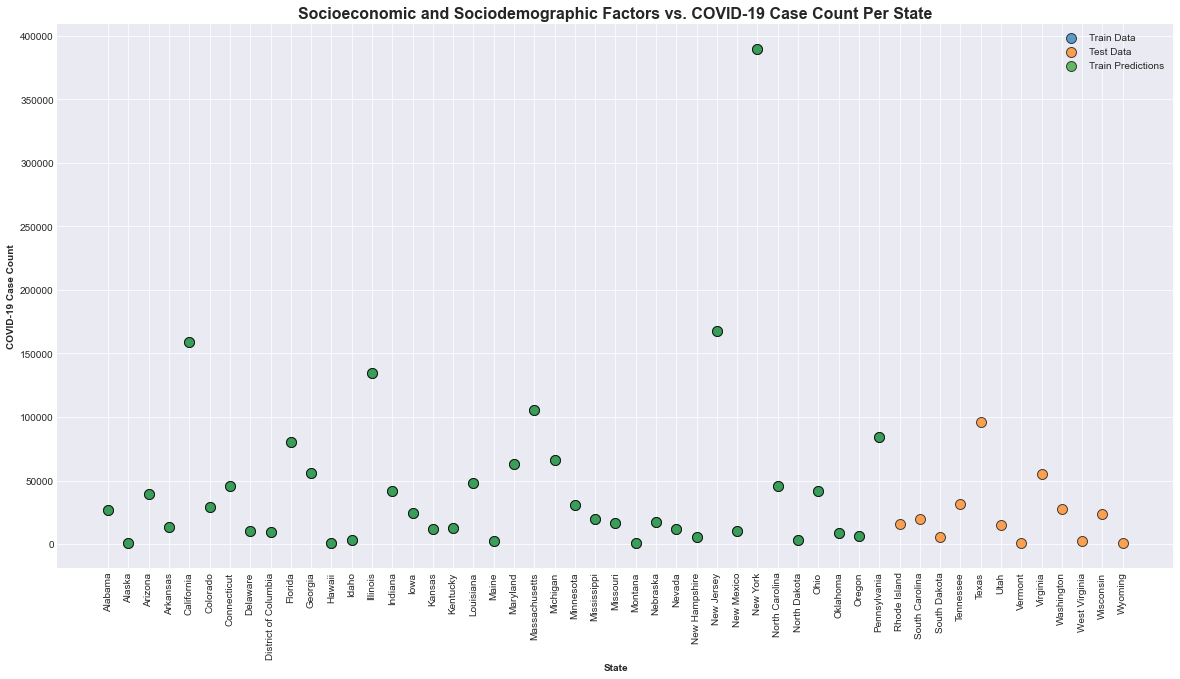

In [29]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

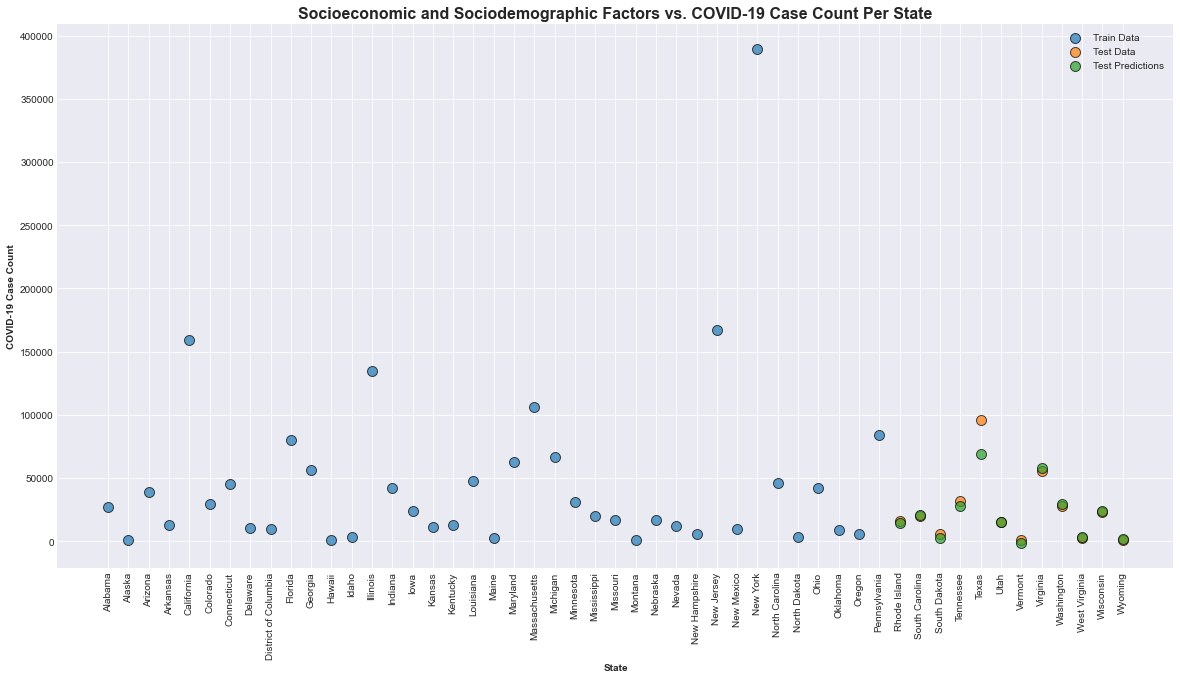

In [30]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

## SVR

In [31]:
features_list = columns
    
target = 'cases'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))

SVRModel = SVR(kernel = 'linear')
SVRModel.fit(X_train_scaled, y_train_scaled)

train_predictions_scaled = SVRModel.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
test_predictions_scaled = SVRModel.predict(X_test_scaled)
test_predictions = scaler.inverse_transform(test_predictions_scaled)

Train_MAE = mean_absolute_error(y_train, train_predictions)
Train_MSE = mean_squared_error(y_train, train_predictions)
Train_RMS = sqrt(mean_squared_error(y_train, train_predictions))
Train_R2Score = r2_score(y_train, train_predictions)

Test_MAE = mean_absolute_error(y_test, test_predictions)
Test_MSE = mean_squared_error(y_test, test_predictions)
Test_RMS = sqrt(mean_squared_error(y_test, test_predictions))
Test_R2Score = r2_score(y_test, test_predictions)

print('Train MAE Value:', Train_MAE)
print('Train MSE Value:', Train_MSE)
print('Train RMS Value:', Train_RMS)
print('Train R2 Score:', Train_R2Score)
print('\n')

print('Test MAE Value:', Test_MAE)
print('Test MSE Value:', Test_MSE)
print('Test RMS Value:', Test_RMS)
print('Test R2 Score:', Test_R2Score)

Train MAE Value: 5292.335830402901
Train MSE Value: 33055480.75019658
Train RMS Value: 5749.3895980526995
Train R2 Score: 0.9931701022585232


Test MAE Value: 5634.688020849321
Test MSE Value: 48833473.90410936
Test RMS Value: 6988.095155627845
Test R2 Score: 0.9287965610215727


c:\python38\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


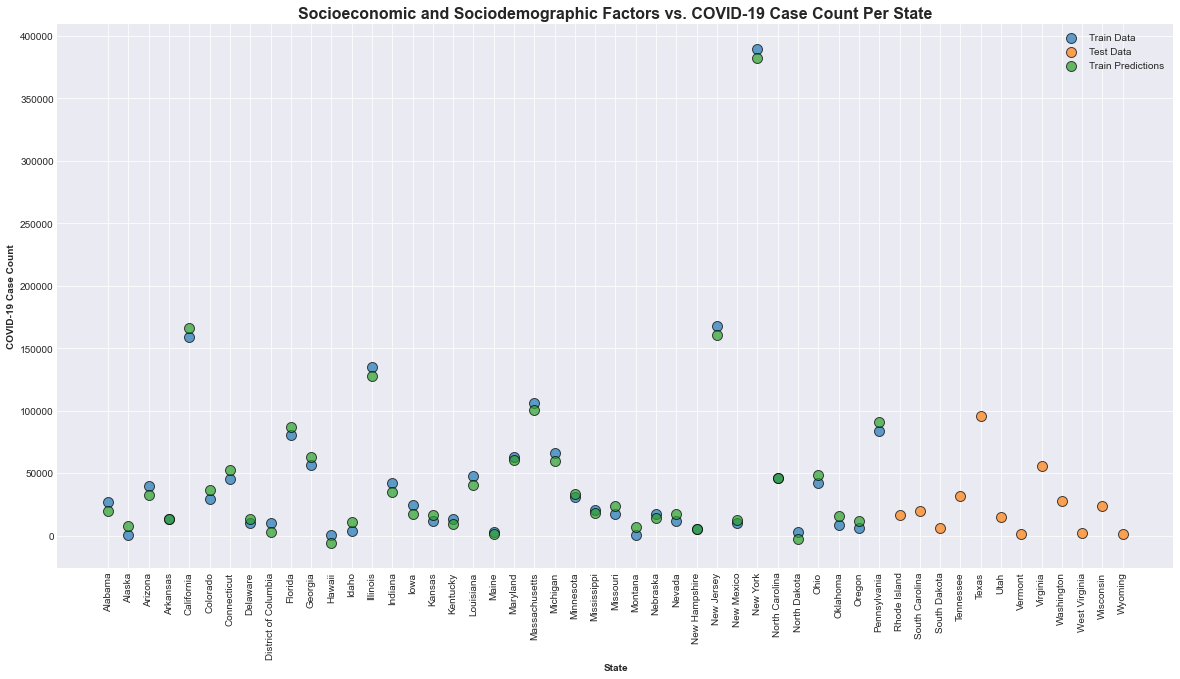

In [32]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

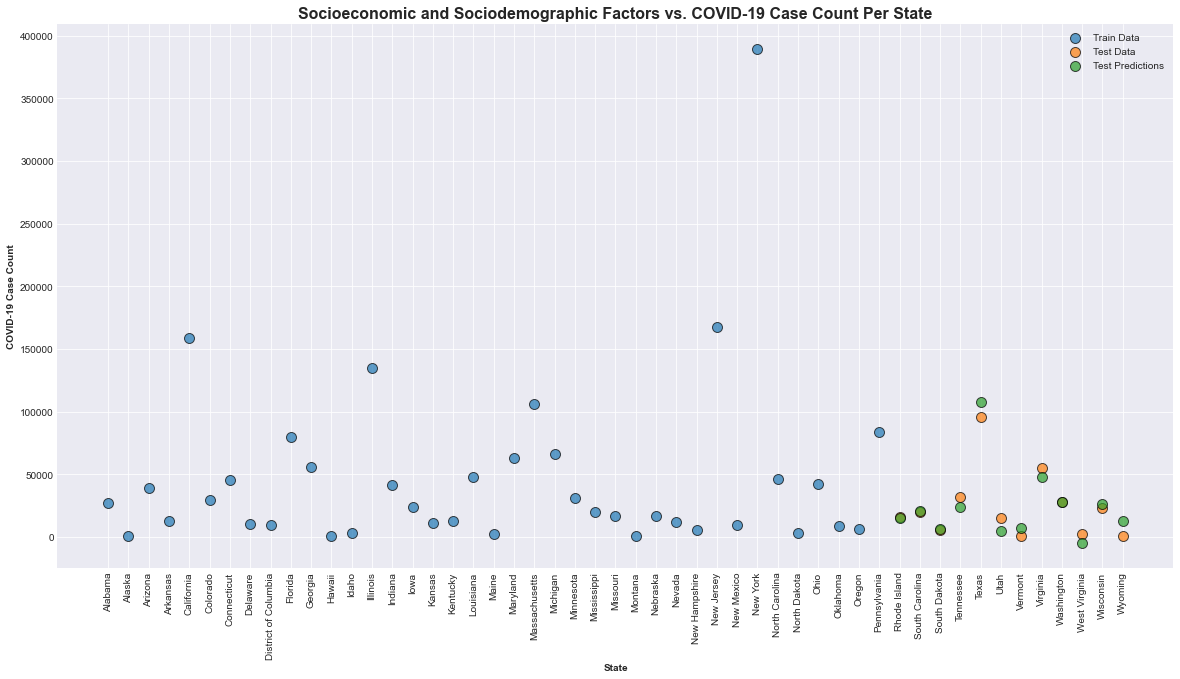

In [33]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

## Random Forest Regression

In [34]:
features_list = columns
    
target = 'cases'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))

RanForModel = RandomForestRegressor()
RanForModel.fit(X_train_scaled, y_train_scaled)

train_predictions_scaled = RanForModel.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
test_predictions_scaled = RanForModel.predict(X_test_scaled)
test_predictions = scaler.inverse_transform(test_predictions_scaled)

Train_MAE = mean_absolute_error(y_train, train_predictions)
Train_MSE = mean_squared_error(y_train, train_predictions)
Train_RMS = sqrt(mean_squared_error(y_train, train_predictions))
Train_R2Score = r2_score(y_train, train_predictions)

Test_MAE = mean_absolute_error(y_test, test_predictions)
Test_MSE = mean_squared_error(y_test, test_predictions)
Test_RMS = sqrt(mean_squared_error(y_test, test_predictions))
Test_R2Score = r2_score(y_test, test_predictions)

print('Train MAE Value:', Train_MAE)
print('Train MSE Value:', Train_MSE)
print('Train RMS Value:', Train_RMS)
print('Train R2 Score:', Train_R2Score)
print('\n')

print('Test MAE Value:', Test_MAE)
print('Test MSE Value:', Test_MSE)
print('Test RMS Value:', Test_RMS)
print('Test R2 Score:', Test_R2Score)

Train MAE Value: 6118.181056166061
Train MSE Value: 266218326.78534827
Train RMS Value: 16316.198294497044
Train R2 Score: 0.9449941762277901


Test MAE Value: 10386.081964285708
Test MSE Value: 621194523.648846
Test RMS Value: 24923.774265725606
Test R2 Score: 0.09424452486797641


<ipython-input-34-e8fbe4dc92cb>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RanForModel.fit(X_train_scaled, y_train_scaled)


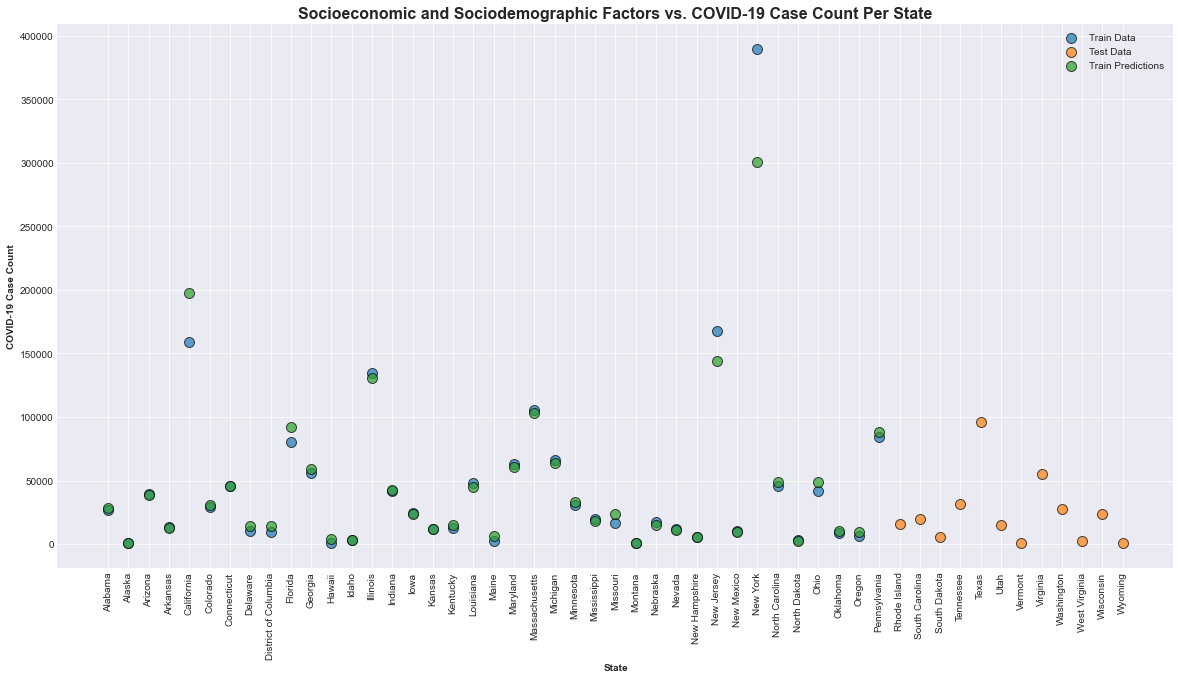

In [35]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

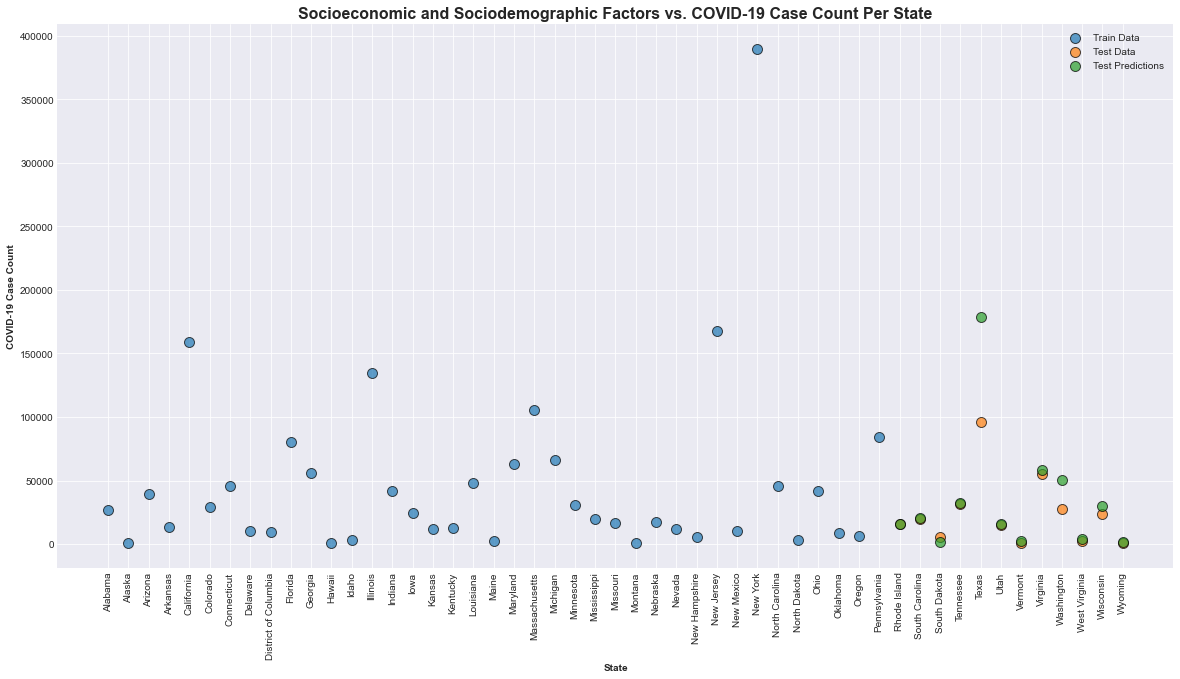

In [36]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [20]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': list(range(0, len(columns)+1)),
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

kfold = KFold(n_splits = 10)

RF_NewModel = GridSearchCV(estimator = RanForModel, param_grid = param_grid, 
                          cv = kfold, n_jobs = -1, verbose = 2, return_train_score=True)

RF_NewModel.fit(X_train_scaled, y_train_scaled);

Fitting 10 folds for each of 11664 candidates, totalling 116640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 6821 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 7914 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 9089 tasks      | 

In [21]:
RF_NewModel.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 77,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [22]:
base_accuracy = evaluate(RanForModel, X_train_scaled, y_train_scaled)

Model Performance
Average Error: 0.8104 degrees.
Accuracy = 92.71%.


In [23]:
new_accuracy = evaluate(RF_NewModel, X_train_scaled, y_train_scaled)

Model Performance
Average Error: 0.8097 degrees.
Accuracy = 94.94%.


In [24]:
print('Improvement of {:0.2f}%.'.format( 100 * (new_accuracy - base_accuracy) / new_accuracy))

Improvement of 2.35%.


In [25]:
train_predictions_scaled = RF_NewModel.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
test_predictions_scaled = RF_NewModel.predict(X_test_scaled)
test_predictions = scaler.inverse_transform(test_predictions_scaled)

Train_MAE = mean_absolute_error(y_train, train_predictions)
Train_MSE = mean_squared_error(y_train, train_predictions)
Train_RMS = sqrt(mean_squared_error(y_train, train_predictions))
Train_R2Score = r2_score(y_train, train_predictions)

Test_MAE = mean_absolute_error(y_test, test_predictions)
Test_MSE = mean_squared_error(y_test, test_predictions)
Test_RMS = sqrt(mean_squared_error(y_test, test_predictions))
Test_R2Score = r2_score(y_test, test_predictions)

print('Train MAE Value:', Train_MAE)
print('Train MSE Value:', Train_MSE)
print('Train RMS Value:', Train_RMS)
print('Train R2 Score:', Train_R2Score)
print('\n')

print('Test MAE Value:', Test_MAE)
print('Test MSE Value:', Test_MSE)
print('Test RMS Value:', Test_RMS)
print('Test R2 Score:', Test_R2Score)

Train MAE Value: 10237.934304148128
Train MSE Value: 1044799732.5476419
Train RMS Value: 32323.362024202277
Train R2 Score: 0.784124291292291


Test MAE Value: 71659.61221596228
Test MSE Value: 5445678911.650086
Test RMS Value: 73794.84339471212
Test R2 Score: -6.940272011841371


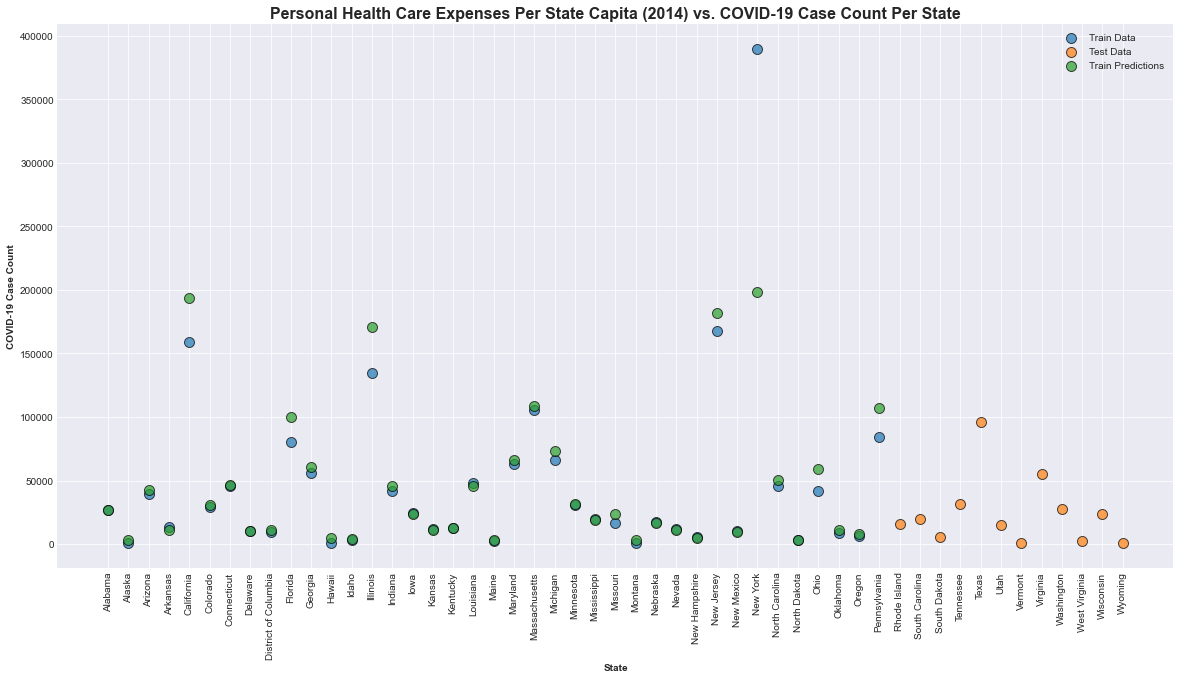

In [26]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Personal Health Care Expenses Per State Capita (2014) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

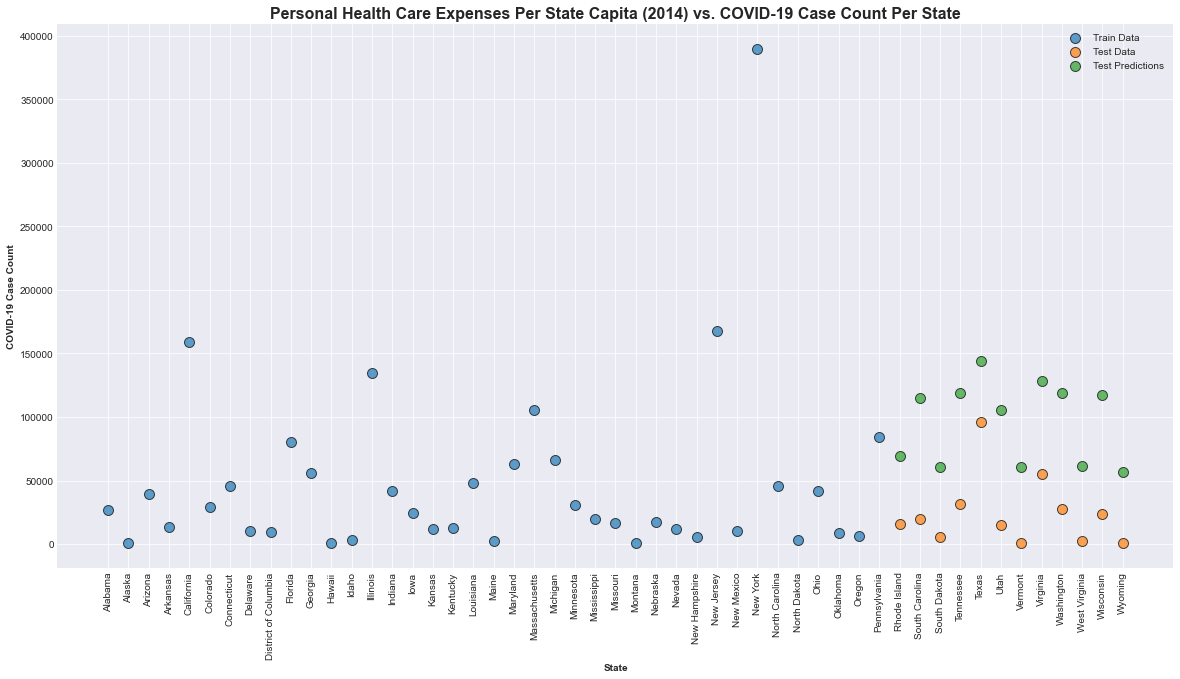

In [27]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Personal Health Care Expenses Per State Capita (2014) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

## XGBoost

In [64]:
features_list = columns
    
target = 'cases'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))

XGBmodel = XGBRegressor()
XGBmodel.fit(X_train_scaled, y_train_scaled)

train_predictions_scaled = XGBmodel.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
test_predictions_scaled = XGBmodel.predict(X_test_scaled)
test_predictions = scaler.inverse_transform(test_predictions_scaled)

Train_MAE = mean_absolute_error(y_train, train_predictions)
Train_MSE = mean_squared_error(y_train, train_predictions)
Train_RMS = sqrt(mean_squared_error(y_train, train_predictions))
Train_R2Score = r2_score(y_train, train_predictions)

Test_MAE = mean_absolute_error(y_test, test_predictions)
Test_MSE = mean_squared_error(y_test, test_predictions)
Test_RMS = sqrt(mean_squared_error(y_test, test_predictions))
Test_R2Score = r2_score(y_test, test_predictions)

print('Train MAE Value:', Train_MAE)
print('Train MSE Value:', Train_MSE)
print('Train RMS Value:', Train_RMS)
print('Train R2 Score:', Train_R2Score)
print('\n')

print('Test MAE Value:', Test_MAE)
print('Test MSE Value:', Test_MSE)
print('Test RMS Value:', Test_RMS)
print('Test R2 Score:', Test_R2Score)

Train MAE Value: 23.08179180438702
Train MSE Value: 1152.2414608608262
Train RMS Value: 33.94468236500124
Train R2 Score: 0.9999997619247649


Test MAE Value: 20815.61973063151
Test MSE Value: 3052531222.6978874
Test RMS Value: 55249.716946767134
Test R2 Score: -3.450855187405028


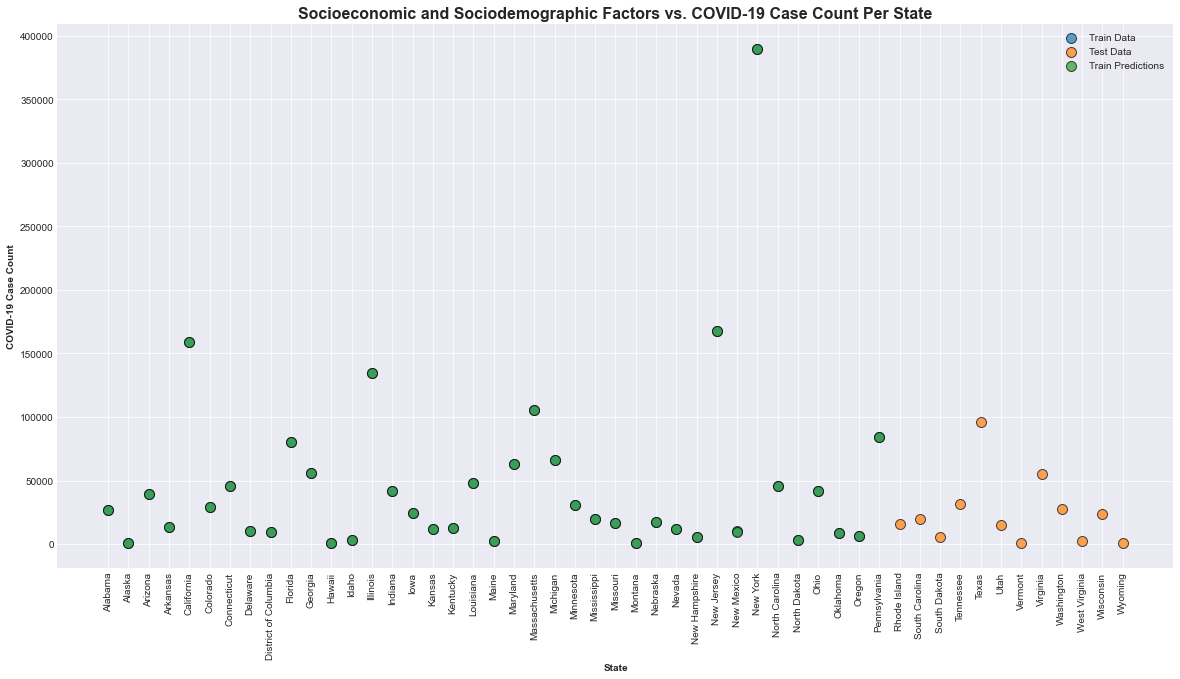

In [65]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

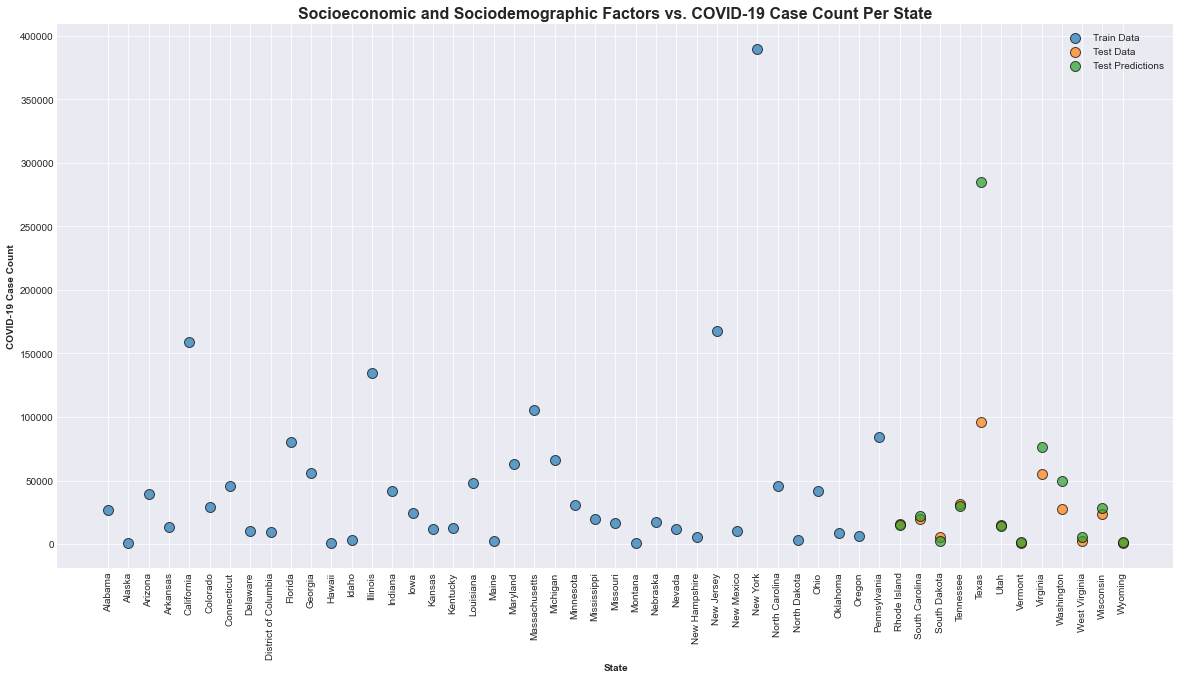

In [66]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [67]:
param_grid = {
    "learning_rate": [0.05, 0.075, 0.1, 0.2, 0.3, 0.4],
    "max_depth": [1, 2, 3, 4, 5, 6, 7],
    "reg_lambda": [1, 1.5, 2, 3, 4.5],
    "min_child_weight": [1, 3, 5, 7],
    "n_estimators": [50, 100, 200, 300, 400, 500, 1000]
}

kfold = KFold(n_splits = 4)

XG_GridModel = GridSearchCV(estimator = XGBmodel, param_grid = param_grid, 
                          cv = kfold, n_jobs = -1, verbose = 2, return_train_score=True)

XG_NewModel = XG_GridModel.fit(X_train_scaled, y_train_scaled);

Fitting 4 folds for each of 5880 candidates, totalling 23520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 204 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 610 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 1176 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 1673 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done 2118 tasks      | elapsed:   59.7s
[Parallel(n_jobs=-1)]: Done 2645 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 3252 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3941 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 4710 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 5561 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 6492 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 7505 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 8892 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 10253 tasks     

In [68]:
XG_NewModel.best_params_

{'learning_rate': 0.05,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 50,
 'reg_lambda': 4.5}

In [69]:
base_accuracy = evaluate(XGBmodel, X_train_scaled, y_train_scaled)

Model Performance
Average Error: 0.8311 degrees.
Accuracy = 91.26%.


In [70]:
new_accuracy = evaluate(XG_NewModel, X_train_scaled, y_train_scaled)

Model Performance
Average Error: 0.7311 degrees.
Accuracy = 100.41%.


In [71]:
print('Improvement of {:0.2f}%.'.format( 100 * (new_accuracy - base_accuracy) / new_accuracy))

Improvement of 9.11%.


In [72]:
train_predictions_scaled = XG_NewModel.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
test_predictions_scaled = XG_NewModel.predict(X_test_scaled)
test_predictions = scaler.inverse_transform(test_predictions_scaled)

Train_MAE = mean_absolute_error(y_train, train_predictions)
Train_MSE = mean_squared_error(y_train, train_predictions)
Train_RMS = sqrt(mean_squared_error(y_train, train_predictions))
Train_R2Score = r2_score(y_train, train_predictions)

Test_MAE = mean_absolute_error(y_test, test_predictions)
Test_MSE = mean_squared_error(y_test, test_predictions)
Test_RMS = sqrt(mean_squared_error(y_test, test_predictions))
Test_R2Score = r2_score(y_test, test_predictions)

print('Train MAE Value:', Train_MAE)
print('Train MSE Value:', Train_MSE)
print('Train RMS Value:', Train_RMS)
print('Train R2 Score:', Train_R2Score)
print('\n')

print('Test MAE Value:', Test_MAE)
print('Test MSE Value:', Test_MSE)
print('Test RMS Value:', Test_RMS)
print('Test R2 Score:', Test_R2Score)

Train MAE Value: 12713.98217147436
Train MSE Value: 1058335400.0754755
Train RMS Value: 32532.06725794528
Train R2 Score: 0.7813275621877783


Test MAE Value: 16528.68310546875
Test MSE Value: 823906886.7942909
Test RMS Value: 28703.778266881363
Test R2 Score: -0.20132767644094707


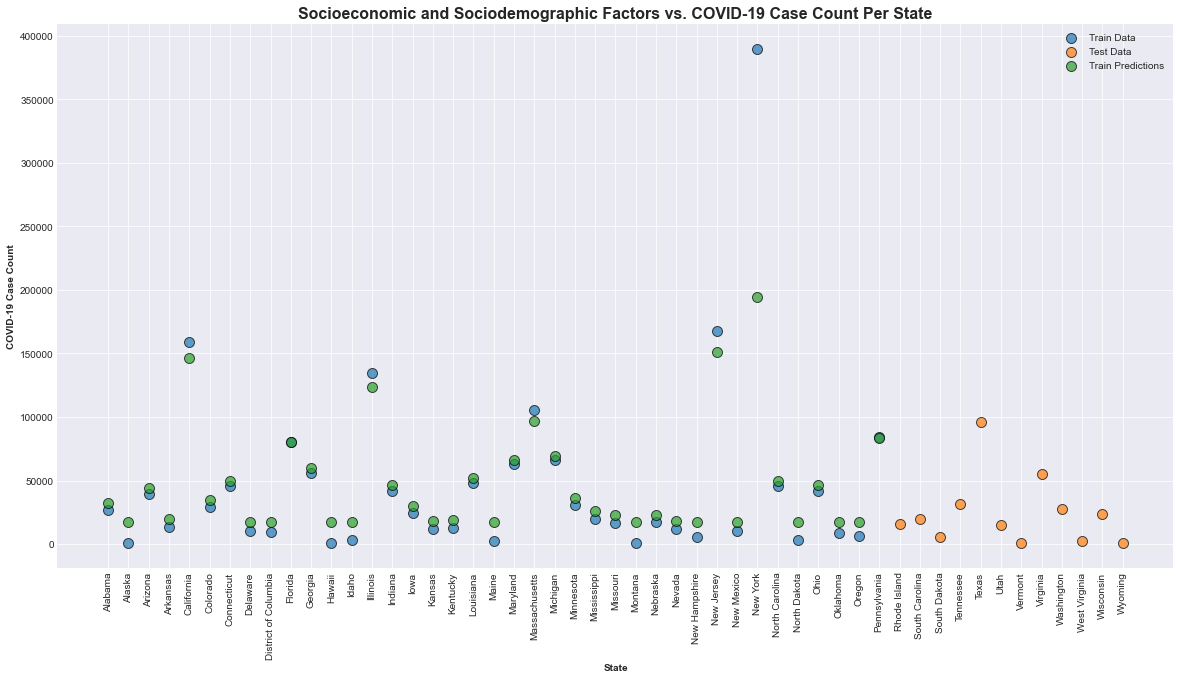

In [73]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

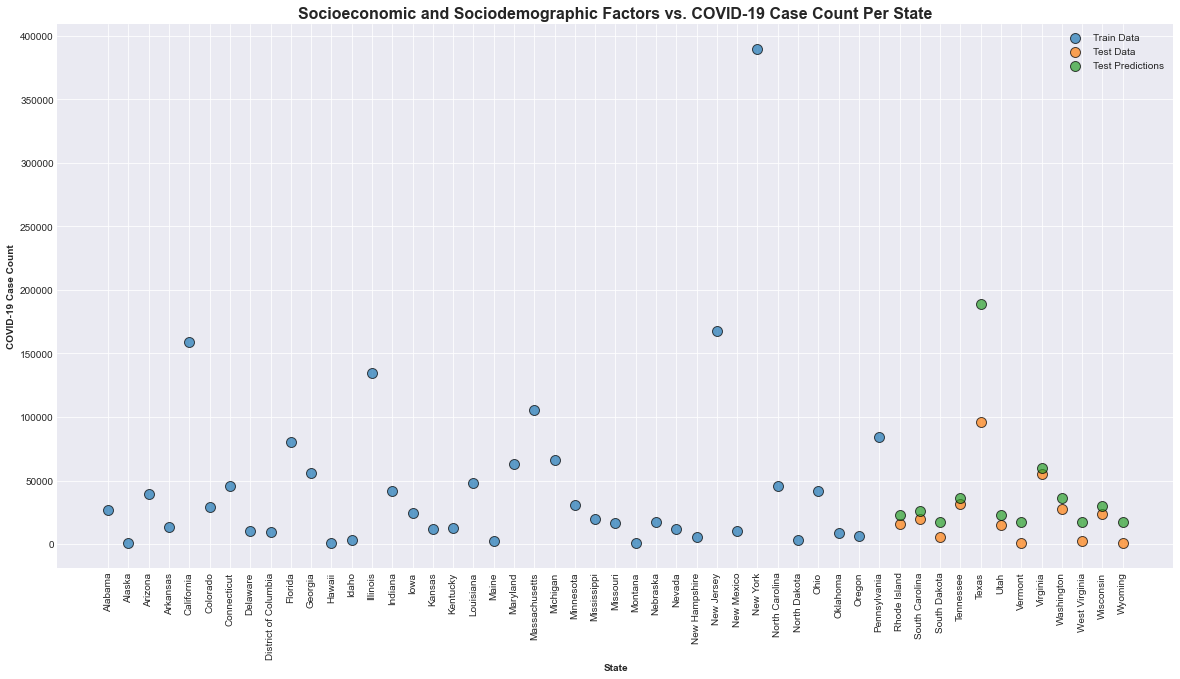

In [74]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

## Logistic Regression

In [75]:
COVID_DFLogReg = COVID_DF

CasesMean = COVID_DFLogReg['cases'].mean()

COVID_DFLogReg['Cases_Avg'] = COVID_DFLogReg['cases'].apply(lambda x: classify(x, CasesMean))

COVID_DFLogReg.head(25)

,State,AGI Total,AGI Top 1 Percent,AGI Top 5 Percent,AGI Top 10 Percent,AGI Top 25 Percent,AGI Top 50 Percent,AGI Top 75 Percent,Total Population,Total population_Male,...,Technical Workers 2018 (Percent),Public School Expenditure 2016(Thousands),State GDP(Millions),School Expenditures per State GDP(Percent),Student Enrollment,School Expenditures per Student Enrollment(Percent),Public School Salary 2018(Dollars),cases,deaths,Cases_Avg
0,Alabama,119662909,18553159,35924229,49537638,76667112,101687773,114405941,4887871,2369271,...,1.377782,6885677.0,203398.0,3.385322,743789.0,9257.567670,50568.0,26912,785,0
1,Alaska,23969001,2848087,6184956,8915998,14554105,20064361,22927860,737438,382952,...,2.020619,2319662.0,49429.0,4.692917,132477.0,17509.922477,69682.0,751,10,0
2,Arizona,197753744,33609317,63073164,85351788,128616004,168531690,189378565,7171646,3565129,...,1.608712,8551673.0,311397.0,2.746228,1109040.0,7710.878778,48723.0,39298,1228,0
3,Arkansas,74634888,16319991,26475276,34256878,49689104,64088761,71584342,3013825,1476680,...,0.974284,4872214.0,120090.0,4.057135,492132.0,9900.217828,50544.0,13191,188,0
4,California,1549284943,356240355,600859502,772738760,1086299917,1360947743,1497300869,39557045,19673553,...,1.566938,72003129.0,2663396.0,2.703433,6305347.0,11419.376126,80680.0,159098,5202,1
5,Colorado,212581123,37479649,69617571,93359185,138935934,181679584,204043171,5695564,2864761,...,1.491620,8648369.0,329097.0,2.627909,899112.0,9618.789428,52701.0,29427,1617,0
6,Connecticut,175792834,47379889,74456114,92142733,125039874,155284852,170426876,3572665,1740533,...,1.627515,10551327.0,262979.0,4.012232,537933.0,19614.574678,74517.0,45349,4210,1
7,Delaware,31403165,4412370,8899481,12464894,19652753,26529258,30056514,967171,467924,...,1.308778,1941408.0,70380.0,2.758465,134847.0,14397.116732,61795.0,10403,424,0
8,District of Columbia,34743188,7442186,13245281,17240750,24153683,30301657,33570901,702455,334208,...,1.510451,1775833.0,129817.0,1.367951,84024.0,21134.830525,76486.0,9818,520,0
9,Florida,750608252,213461301,325886670,401558825,540976844,663846145,726074247,21299325,10404676,...,0.968327,25621239.0,938370.0,2.730398,2792234.0,9175.892493,48168.0,80101,2992,1


In [76]:
model2 = sm.OLS(COVID_DFLogReg['Cases_Avg'], COVID_DFLogReg[columns], missing = 'drop').fit()
model2.summary()

c:\python38\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\python38\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
c:\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
c:\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
c:\python38\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Cases_Avg   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 18 Jun 2020   Prob (F-statistic):                nan
Time:                        17:33:53   Log-Likelihood:                 1304.7
No. Observations:                  51   AIC:                            -2507.
Df Residuals:                       0   BIC:                            -2409.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
AGI Top 5 Percent                                                -3.495e-07        inf         -0        nan         nan         nan
AGI Top 10 Percent                                                3.832e-07        inf          0        nan         nan         nan
AGI Top 25 Percent                                                 1.06e-07        inf          0        nan         nan         nan
AGI Top 50 Percent                                               -1.408e-07        inf         -0        nan         nan         nan
AGI Top 75 Percent                                               -3.722e-09        inf         -0        nan         nan         nan
Total Population                                                 -8.565e-07        inf         -0        nan         nan         nan
Total population_Male                                             2.386e-06        inf          0        nan         nan         nan
Total population_Female                                          -3.243e-06        inf         -0        nan         nan         nan
Under 5 years                                                     3.057e-05        inf          0        nan         nan         nan
5 to 9 years                                                     -1.239e-05        inf         -0        nan         nan         nan
10 to 14 years                                                    2.154e-05        inf          0        nan         nan         nan
15 to 19 years                                                   -8.478e-07        inf         -0        nan         nan         nan
20 to 24 years                                                    7.761e-06        inf          0        nan         nan         nan
25 to 34 years                                                   -6.211e-06        inf         -0        nan         nan         nan
35 to 44 years                                                   -9.209e-06        inf         -0        nan         nan         nan
45 to 54 years                                                    6.763e-06        inf          0        nan         nan         nan
55 to 59 years                                                   -1.966e-05        inf         -0        nan         nan         nan
60 to 64 years                                                   -1.347e-05        inf         -0        nan         nan         nan
65 to 74 years                                                    1.073e-05        inf          0        nan         nan         nan
75 to 84 years                                                   -2.277e-05        inf         -0        nan         nan         nan
85 years and over       

In [77]:
test_len = int(0.25 * len(COVID_DFLogReg))
train_len = len(COVID_DFLogReg) - test_len
print('Train Set Len: ' + str(train_len))
print('Test Set Len: ' + str(test_len))

train = COVID_DFLogReg[:train_len]
test = COVID_DFLogReg[train_len:]
print('Train Set Shape: ' + str(train.shape))
print('Test Set Shape: ' + str(test.shape))

Train Set Len: 39
Test Set Len: 12
Train Set Shape: (39, 97)
Test Set Shape: (12, 97)


In [78]:
features_list = columns
    
target = 'Cases_Avg'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

LogRegModel = LogisticRegression()
LogRegModel.fit(X_train_scaled, y_train)

train_predictions = LogRegModel.predict(X_train_scaled)
test_predictions = LogRegModel.predict(X_test_scaled)

Train_MAE = mean_absolute_error(y_train, train_predictions)
Train_MSE = mean_squared_error(y_train, train_predictions)
Train_RMS = sqrt(mean_squared_error(y_train, train_predictions))
Train_R2Score = r2_score(y_train, train_predictions)

Test_MAE = mean_absolute_error(y_test, test_predictions)
Test_MSE = mean_squared_error(y_test, test_predictions)
Test_RMS = sqrt(mean_squared_error(y_test, test_predictions))
Test_R2Score = r2_score(y_test, test_predictions)

print('Train MAE Value:', Train_MAE)
print('Train MSE Value:', Train_MSE)
print('Train RMS Value:', Train_RMS)
print('Train R2 Score:', Train_R2Score)
print('\n')

print('Test MAE Value:', Test_MAE)
print('Test MSE Value:', Test_MSE)
print('Test RMS Value:', Test_RMS)
print('Test R2 Score:', Test_R2Score)

Train MAE Value: 0.02564102564102564
Train MSE Value: 0.02564102564102564
Train RMS Value: 0.16012815380508713
Train R2 Score: 0.8885714285714286


Test MAE Value: 0.0
Test MSE Value: 0.0
Test RMS Value: 0.0
Test R2 Score: 1.0


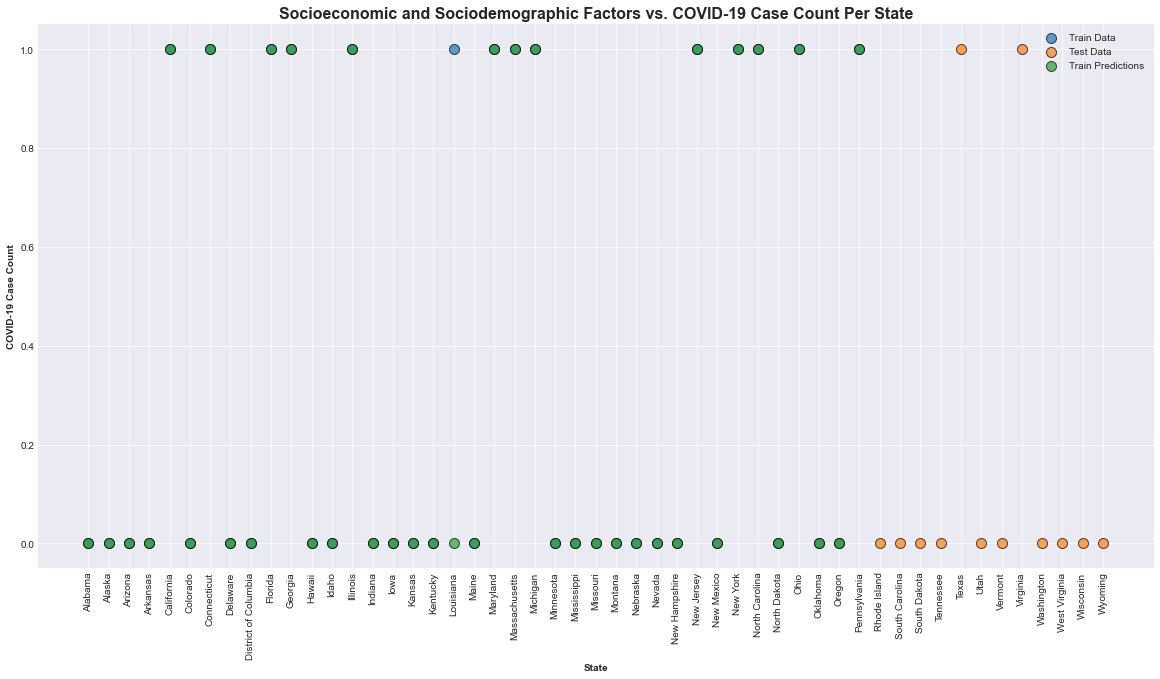

In [79]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

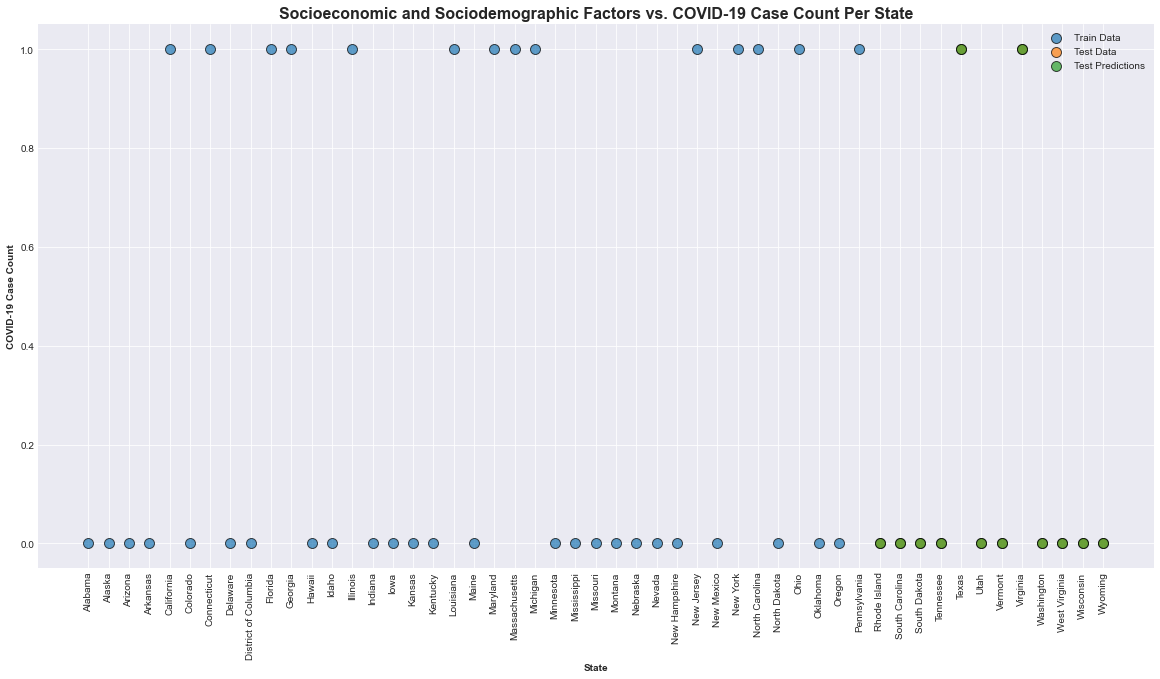

In [80]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();